In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Questão 1

Considere a função
$E(n) = 
\left(1 +
\frac{1}{n}
\right)^n
$

Sabe-se, do curso de Cálculo, que $\lim_{n \rightarrow \infty} E(n) = e$.

Usando Python, avalie o valor de $E$ nos valores
$n$ = $10^0$, $10^3$, $10^6$, $10^9$, $10^{12}$, $10^{15}$ e $10^{18}$.

Compare os valores obtidos com o número e e comente sobre os resultados obtidos.

Após implementar $E(n)$ via programação funcional e gerar os dados de entrada por meio da biblioteca `numpy`, calculei os valores da saída $E(n)$ de acordo com a entrada

In [ ]:
# Funcao que calcula E(n)
E = lambda n: np.power(1 + 1/n, n)

# valores guarda o conjunto de valores que n assume
valores = np.power(10, np.array([3*i for i in range(7)]))
for num in valores:
  print("%.1e" %num)

1.0e+00
1.0e+03
1.0e+06
1.0e+09
1.0e+12
1.0e+15
1.0e+18


In [ ]:
saida = E(valores)

print("Alvo:", np.exp(1.0))

print("\nSaida:")
for num in saida:
  print(num)

Alvo: 2.718281828459045

Saida:
2.0
2.7169239322355936
2.7182804690957534
2.7182820520115603
2.7185234960372378
3.035035206549262
1.0


Comparando os resultados com $e$, notei que o aumento do valor de $n$ aproxima $E(n)$ de $e$ até $n = 10^9$. A partir desse valor, o aumento de $n$ afasta $E(n)$ de $e$.

Para visualizar esse resultado, confeccionei um gráfico de $n$ por Erro Relativo $\left| E(n) - e\right|$ em escala log-log com auxílio da biblioteca `matplotlib.pyplot`. A representação visual concorda com o observado nos dados.

Considerando o estudado em MS211 e em Cálculo, concluí que o comportamento no intervalo $[10^0, 10^9]$ se deve à aproximação de $n$ do infinito conforme prevê a análise do limite; e, no intervalo $[10^9, 10^{18}]$, a aparente contradição entre o incremento do valor de $n$ aumentar o erro relativo ocorre por causa das limitações de precisão do ponto flutuante. Isto é, para $n > 10^9$, os erros de arrendondamento passam a influenciar o resultado, afastando o valor calculado da resposta correta da conta. 

Tal fato deve ocorrer devido à aproximação do erro relativo máximo de $\frac{1}{n}$ do épsilon da máquina $\epsilon_{mach} = 2,2 \times 10^{-16}$ com o aumento de $n$. Por exemplo, $\frac{1}{10^{18}} = 10^{-18} < 2,2 \times 10^{-16}$, o que afeta o resultado de $1 + \frac{1}{n}$. Em sequência, o cálculo do expoente pode propagar o erro.

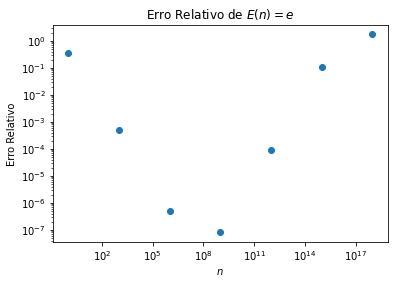

In [ ]:
erro_rel = np.abs(saida - np.exp(1.0)) / saida
plt.loglog(valores, erro_rel, "o")
plt.xlabel("$n$")
plt.ylabel("Erro Relativo")
plt.title("Erro Relativo de $ E(n) = e$")

plt.show()

# Questão 2

Determine a menor raiz positiva da equação

$0.05010 x^2 − 98.78 x + 5.015 = 0$,

considerando o sistema de pontos flutuantes $F(10, 4, 100, 100)$.

Sabendo que a menor raiz da equação é
$x = 0.05077069387$, determine o erro absoluto e o erro relativo do resultado obtido numericamente usando
o sistema de pontos flutuantes.

In [ ]:
emach = 0.5 * 10 ** (1 - 4)

def fl(x):
    return float( format(x, "1.3e") )

emach

0.0005

Para encontrar a menor raiz, avaliei a versão negativa da Fórmula de Bhaskara.

$x_{menor} = \dfrac{-b - \sqrt{b^2 - 4 \times a \times c}}{2 \times a}$

Considerando o sistema de ponto flutuante descrito, criei uma função (`fl(x)`) que realiza a conversão de um número real para o sistema.

Então, pude determinar os coeficientes da função para utilizá-los na fórmula de $x_{menor}$ e obtive $a = 0.0501$, $b = -98.78$, $c = 5.015$.

In [ ]:
a = fl(0.05010)
b = fl(-98.78)
c = fl(5.015)
a, b, c

(0.0501, -98.78, 5.015)

In [ ]:
def plus(x, y):
    return fl(x + y)

def minus(x, y):
    return plus(x, -y)

def times(x, y):
    return fl(x * y)

def sq(x):
    return times(x, x)

def div(x, y):
    return fl(x / y)

def sqrt(x):
    return fl(np.sqrt(x))

Após adaptar as operações matemáticas para versões respectivas que considerassem o sistema de ponto flutuante utilizado, calculei o valor de $x_{menor}$. O resultado foi $x_{menor} = 0.0998$. Considerando que o valor correto é $x_{menor} = 0.05077069387$, o cálculo apresentou erros absoluto de $0.04903$ e relativo de $0.9657$, aproximadamente.

In [ ]:
x_menor = div( minus( -b, sqrt( minus( sq(b), times(4, times(a, c) ) ) ) ), times(2, a) )
x_menor

0.0998

In [ ]:
x_menor_dado = 0.05077069387

erro_absoluto = abs(x_menor_dado - x_menor)
erro_relativo = erro_absoluto/x_menor_dado

erro_absoluto, erro_relativo

(0.04902930613, 0.9657009269075801)